<a href="https://colab.research.google.com/github/mohanrajmit/Bird-Classification-using-CNN/blob/master/Multiclass_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


Using TensorFlow backend.


In [0]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [20]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
y_train[100],Y_train[100]
#Y_train[10]

(array([8], dtype=uint8),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

In [16]:
print(x_test.shape)
print(x_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [6]:
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
#model.add()
#ip = Input(shape=(32, 32, 3))
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [8]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [17]:
model.fit(x_train,Y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 16s 312us/step - loss: 1.3619 - acc: 0.5075 - val_loss: 1.1277 - val_acc: 0.6001
Epoch 2/10
50000/50000 [==============================] - 13s 261us/step - loss: 0.9143 - acc: 0.6784 - val_loss: 0.8821 - val_acc: 0.6894
Epoch 3/10
50000/50000 [==============================] - 13s 255us/step - loss: 0.7188 - acc: 0.7479 - val_loss: 0.7948 - val_acc: 0.7332
Epoch 4/10
50000/50000 [==============================] - 13s 259us/step - loss: 0.5633 - acc: 0.8022 - val_loss: 0.7995 - val_acc: 0.7300
Epoch 5/10
50000/50000 [==============================] - 13s 255us/step - loss: 0.4331 - acc: 0.8477 - val_loss: 0.8200 - val_acc: 0.7436
Epoch 6/10
50000/50000 [==============================] - 13s 254us/step - loss: 0.3136 - acc: 0.8894 - val_loss: 0.8610 - val_acc: 0.7452
Epoch 7/10
500

In [10]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="sigmoid"))

# Compile the model
model.compile(
    loss='categorical_crossentropy,
    optimizer="adam",
    metrics=['accuracy']
)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# Train the model
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, Y_test),
    shuffle=True
)

# Save the trained model to a file so we can use it to make predictions later
model.save("bird_model.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 311us/step - loss: 0.3142 - acc: 0.8935 - val_loss: 0.2478 - val_acc: 0.9075
Epoch 2/10
50000/50000 [==============================] - 15s 290us/step - loss: 0.2480 - acc: 0.9061 - val_loss: 0.2384 - val_acc: 0.9099
Epoch 3/10
50000/50000 [==============================] - 15s 293us/step - loss: 0.2310 - acc: 0.9130 - val_loss: 0.2367 - val_acc: 0.9159
Epoch 4/10
50000/50000 [==============================] - 15s 291us/step - loss: 0.2138 - acc: 0.9185 - val_loss: 0.2243 - val_acc: 0.9151
Epoch 5/10
50000/50000 [==============================] - 14s 290us/step - loss: 0.2028 - acc: 0.9234 - val_loss: 0.2323 - val_acc: 0.9144
Epoch 6/10
50000/50000 [==============================] - 14s 288us/step - loss: 0.1885 - acc: 0.9282 - val_loss: 0.2292 - val_acc: 0.9173
Epoch 7/10
50000/50000 [==============================] - 14s 288us/step - loss: 0.1803 - acc: 0.9307 - val_loss: 0.

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [14]:
# Load the model we trained
model = load_model('bird_model.h5')
predictions = model.predict(x_test, batch_size=32, verbose=1)

# If the model is more than 50% sure the object is a bird, call it a bird.
# Otherwise, call it "not a bird".
predictions = predictions > 0.5

# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate Precision and Recall for each class
report = classification_report(y_test, predictions)
print(report)

10000/10000 [==============================] - 1s 98us/step
True Positives: 480
True Negatives: 8879
False Positives: 121
False Negatives: 520
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9000
           1       0.80      0.48      0.60      1000

    accuracy                           0.94     10000
   macro avg       0.87      0.73      0.78     10000
weighted avg       0.93      0.94      0.93     10000



In [15]:
for i,pred in enumerate(predictions):
  if pred>0.5:
    print(i,pred)
    print("bird")

65 [ True]
bird
75 [ True]
bird
84 [ True]
bird
100 [ True]
bird
112 [ True]
bird
113 [ True]
bird
123 [ True]
bird
138 [ True]
bird
156 [ True]
bird
160 [ True]
bird
182 [ True]
bird
186 [ True]
bird
236 [ True]
bird
248 [ True]
bird
291 [ True]
bird
309 [ True]
bird
322 [ True]
bird
323 [ True]
bird
353 [ True]
bird
374 [ True]
bird
387 [ True]
bird
388 [ True]
bird
391 [ True]
bird
409 [ True]
bird
424 [ True]
bird
436 [ True]
bird
437 [ True]
bird
441 [ True]
bird
448 [ True]
bird
449 [ True]
bird
497 [ True]
bird
498 [ True]
bird
537 [ True]
bird
548 [ True]
bird
559 [ True]
bird
569 [ True]
bird
592 [ True]
bird
603 [ True]
bird
623 [ True]
bird
631 [ True]
bird
691 [ True]
bird
692 [ True]
bird
697 [ True]
bird
701 [ True]
bird
706 [ True]
bird
731 [ True]
bird
748 [ True]
bird
754 [ True]
bird
758 [ True]
bird
765 [ True]
bird
802 [ True]
bird
810 [ True]
bird
813 [ True]
bird
821 [ True]
bird
832 [ True]
bird
833 [ True]
bird
837 [ True]
bird
839 [ True]
bird
843 [ True]
bird


[[0.]]
not bird


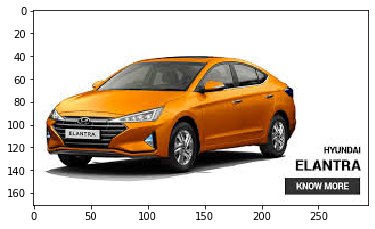

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("/content/car.jpg")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
#img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
#sample_test_image = x_test[100]
b = np.expand_dims(img2, axis=0)
res=model.predict(b)
#print(label_name[int(res)])

plt.imshow(img)
print(res)
if res > 0.5:
  print("bird")
else:
  print("not bird")